# 1994 Census bureau databas

### Goal: Objective: Given some characteristics, return the probability of receiving more than \$50k

[Reference: Nham, Tracy. Classifying Income from 1994 Census Data](http://cseweb.ucsd.edu/classes/sp15/cse190-c/reports/sp15/024.pdf)

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Adult_Census_Income.csv')

#### A) What we have?

In [3]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


#### B) Selecting features

In [4]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

- 'fnlwgt': not useful for this work.
- 'education.num': the feature 'education' is enough.
- 'income': our target.

In [5]:
target = 'income'
black_cols = ['fnlwgt','education.num','income']
features = df.columns.tolist()
for col in black_cols:
    features.pop(features.index(col))
print(features)

['age', 'workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'capital.gain', 'capital.loss', 'hours.per.week', 'native.country']


#### C) Filtering and staging values 

- Taking a look at unique values. *Some values like numbers may not be seen below.*

In [6]:
cols_not_uniques = []
for col in features:
    try:
        uniqs = df[col].unique()
        print('Feature: \'{}\', total uniques {}:\n{}\n\n'.format(col,len(uniqs),"\n".join(uniqs)))
    except Exception as e:
        cols_not_uniques.append(col)
        

Feature: 'workclass', total uniques 9:
?
Private
State-gov
Federal-gov
Self-emp-not-inc
Self-emp-inc
Local-gov
Without-pay
Never-worked


Feature: 'education', total uniques 16:
HS-grad
Some-college
7th-8th
10th
Doctorate
Prof-school
Bachelors
Masters
11th
Assoc-acdm
Assoc-voc
1st-4th
5th-6th
12th
9th
Preschool


Feature: 'marital.status', total uniques 7:
Widowed
Divorced
Separated
Never-married
Married-civ-spouse
Married-spouse-absent
Married-AF-spouse


Feature: 'occupation', total uniques 15:
?
Exec-managerial
Machine-op-inspct
Prof-specialty
Other-service
Adm-clerical
Craft-repair
Transport-moving
Handlers-cleaners
Sales
Farming-fishing
Tech-support
Protective-serv
Armed-Forces
Priv-house-serv


Feature: 'relationship', total uniques 6:
Not-in-family
Unmarried
Own-child
Other-relative
Husband
Wife


Feature: 'race', total uniques 5:
White
Black
Asian-Pac-Islander
Other
Amer-Indian-Eskimo


Feature: 'sex', total uniques 2:
Female
Male


Feature: 'native.country', total uniques 42:


In [7]:
black_vals = ['?']

In [8]:
cols_not_uniques

['age', 'capital.gain', 'capital.loss', 'hours.per.week']

In [9]:
df[cols_not_uniques].describe()

,age,capital.gain,capital.loss,hours.per.week
count,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1077.648844,87.303830,40.437456
std,13.640433,7385.292085,402.960219,12.347429
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


- Thinking about a person's use at any time, knowing and reporting the capital gain in the year may cause an inconsistent data entry.

In [10]:
black_cols.extend(['capital.gain','capital.loss'])
features_num = ['age','hours.per.week']

In [11]:
features = df.columns.tolist()
for col in black_cols:
    features.pop(features.index(col))
print(features)

['age', 'workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'hours.per.week', 'native.country']


In [12]:
features_cat = features
for col in features_num:
    features_cat.pop(features_cat.index(col))

In [13]:
print("Categorical features: {}\n\nNumerical features: {}".format(features_cat,features_num))

Categorical features: ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']

Numerical features: ['age', 'hours.per.week']


#### Creating the model

- Dictionary for categorical features.

In [14]:
col = 'race'


In [15]:
features_cat_dict = {}
for col in features_cat:
    tmp = df[col].unique().tolist()
    for val in black_vals:
        if val in tmp:
            tmp.pop(tmp.index(val))
    features_cat_dict[col] = tmp

In [16]:
features_cat_dict

{'workclass': ['Private',
  'State-gov',
  'Federal-gov',
  'Self-emp-not-inc',
  'Self-emp-inc',
  'Local-gov',
  'Without-pay',
  'Never-worked'],
 'education': ['HS-grad',
  'Some-college',
  '7th-8th',
  '10th',
  'Doctorate',
  'Prof-school',
  'Bachelors',
  'Masters',
  '11th',
  'Assoc-acdm',
  'Assoc-voc',
  '1st-4th',
  '5th-6th',
  '12th',
  '9th',
  'Preschool'],
 'marital.status': ['Widowed',
  'Divorced',
  'Separated',
  'Never-married',
  'Married-civ-spouse',
  'Married-spouse-absent',
  'Married-AF-spouse'],
 'occupation': ['Exec-managerial',
  'Machine-op-inspct',
  'Prof-specialty',
  'Other-service',
  'Adm-clerical',
  'Craft-repair',
  'Transport-moving',
  'Handlers-cleaners',
  'Sales',
  'Farming-fishing',
  'Tech-support',
  'Protective-serv',
  'Armed-Forces',
  'Priv-house-serv'],
 'relationship': ['Not-in-family',
  'Unmarried',
  'Own-child',
  'Other-relative',
  'Husband',
  'Wife'],
 'race': ['White',
  'Black',
  'Asian-Pac-Islander',
  'Other',
  'Am

- Get randomly sample dataset and some categories:

In [150]:
some_cats = ['education','age','marital.status','sex']

df_tmp = df.sample()
df_tmp

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
22361,65,?,117162,Assoc-voc,11,Married-civ-spouse,?,Wife,White,Female,0,0,56,United-States,>50K


In [42]:
cond = (df[some_cats[0]] == df_tmp[some_cats[0]].values.tolist()[0])
for col in some_cats[1:]:
    cond = (cond & (df[col] == df_tmp[col].values.tolist()[0]))
df_pop = df.loc[cond]
df_pop

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
309,23,Private,213955,HS-grad,9,Never-married,Adm-clerical,Own-child,Black,Male,0,2001,40,United-States,<=50K
1160,23,Private,435835,HS-grad,9,Never-married,Sales,Not-in-family,White,Male,0,1669,55,United-States,<=50K
1286,23,Private,220993,HS-grad,9,Never-married,Sales,Not-in-family,White,Male,0,1590,48,United-States,<=50K
3881,23,Private,160951,HS-grad,9,Never-married,Craft-repair,Own-child,Black,Male,2597,0,40,United-States,<=50K
4437,23,Private,115458,HS-grad,9,Never-married,Transport-moving,Own-child,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30717,23,Private,236994,HS-grad,9,Never-married,Sales,Own-child,White,Male,0,0,60,United-States,<=50K
30956,23,Private,376383,HS-grad,9,Never-married,Other-service,Unmarried,White,Male,0,0,35,Mexico,<=50K
31212,23,Private,234302,HS-grad,9,Never-married,Handlers-cleaners,Not-in-family,Black,Male,0,0,40,United-States,<=50K
31357,23,Private,60331,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States,<=50K


In [19]:
target_val = '>50K'
tg_vals = ((df_pop[target] == '>50K')*1).values.tolist()
N = len(df)
n = len(tg_vals)
p = 100*sum(tg_vals)/n
s = 100*n/N
print(df_tmp)
print("P(target) = {:.2f}%, with {:,}/{:,} ({:.4f}%) of the entire dataset.".format(p,n,N,s))

       education  age      marital.status   sex
18738  Doctorate   34  Married-civ-spouse  Male
P(target) = 85.71%, with 7/32,561 (0.0215%) of the entire dataset.


# Done!!

In [22]:
features_num

['age', 'hours.per.week']

In [23]:
features_cat

['workclass',
 'education',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native.country']

In [28]:
features = []
features.extend(features_cat)
features.extend(features_num)
features_label = {}
for feat in features:
    features_label[feat] = " ".join(feat.split('.')).capitalize()

In [29]:
features_label

{'workclass': 'Workclass',
 'education': 'Education',
 'marital.status': 'Marital status',
 'occupation': 'Occupation',
 'relationship': 'Relationship',
 'race': 'Race',
 'sex': 'Sex',
 'native.country': 'Native country',
 'age': 'Age',
 'hours.per.week': 'Hours per week'}

In [37]:
list(features_label.values())

['Workclass',
 'Education',
 'Marital status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Native country',
 'Age',
 'Hours per week']

In [39]:
features_label.get('Age')

In [159]:
not '?' in df_tmp.values.tolist()[0]

False

In [160]:
import random

In [200]:
random.choices(,k=3)

['Native country', 'Occupation', 'Race']

In [331]:
random.randint(1,9)

2

In [388]:
random.choice(list(features_label.keys()))

'native.country'

In [476]:
tmp = list(features_label.keys())
random.shuffle(tmp)
print(tmp[:random.randint(1,len(tmp))])

['native.country']


In [484]:
pd.DataFrame([(key,val) for key,val in features_label.items()],columns=['Char.','Value'])
    

,Char.,Value
0,workclass,Workclass
1,education,Education
2,marital.status,Marital status
3,occupation,Occupation
4,relationship,Relationship
5,race,Race
6,sex,Sex
7,native.country,Native country
8,age,Age
9,hours.per.week,Hours per week


In [486]:
list(features_label.keys())

['workclass',
 'education',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native.country',
 'age',
 'hours.per.week']

In [487]:
import matplotlib.pyplot as plt

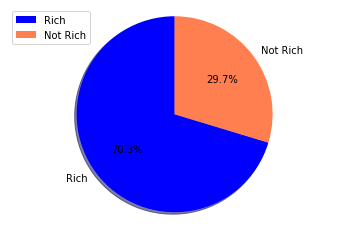

In [494]:
s = 70.32
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['Rich', 'Not Rich']
colors = ['blue', 'coral']
sizes = [s, 100-s]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%0.1f%%', colors=colors,
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend()

plt.show()


# Demonstration and experiments with Streamlit


 - **PoC_Adult_Census_Income_Probability.ipynb:** PoC for product engine.
 - **Prototype_Adult_Census_Income_Probability.py:** Product's prototype.
 - **set_config.sh:** to configure better the Streamlit, working for external access.
 - **Others \*.py:** only experiments.
 - **\*.toml:** config file for Streamlit.